[org-toggle-latex-overlays> ](org-toggle-latex-overlays> )[org-toggle-pretty-entities> ](org-toggle-pretty-entities> )


# Deriving rate laws from mechanisms




## An application in ethane cracking



-   Adapted from Fogler, 4th ed. Example 7-2 page 387

-   Ethane cracks at high temperatures to form hydrogen, ethylene and higher hydrocarbons that are more valuable than ethane

\begin{align*}
{C_2H_6} $\rightarrow {H_2} + {C_2H_4} + other\;products
\end{align*}

-   Ethane cracks according to the following mechanism

\begin{align*}
{C_2H_6} \rightarrow 2 {CH_3\cdot} \\
{CH_3\cdot} + {C_2H_6} \rightarrow {CH_4} + {C_2H_5\cdot}  \\
{C_2H_5\cdot} \rightarrow {H\cdot} + {C_2H_4}  \\
{C_2H_6} + {H\cdot} \rightarrow {C_2H_5\cdot} + {H_2} \\
2 {C_2H_5\cdot} \rightarrow {C_4H_{10}}
\end{align*}

-   A = ${C_2H_6}$
-   B = $CH_3\cdot$
-   C = $C_2H_5\cdot$
-   D = $H\cdot$
-   E = ${C_2H_4}$
-   With these rate laws

\begin{align*}
r_1 = k_1 C_A \\
r_2 = k_2 C_A C_B \\
r_3 = k_3 C_C \\
r_4 = k_4 C_A C_D \\
r_5 = k_5 C_C^2
\end{align*}

-   In this mechanism, any species with a $\cdot$ is a radical (a highly reactive intermediate species) whose concentration cannot be easily measured

-   We would like an analytical expression for the rate of consumption of ethane, and the rate of production of ethylene

-   The rate constants of these particular steps are known:
    -   k\_1 = 1.5e-3 1/s
    -   k\_2 = 2.3e6 L/mol/s
    -   k\_3 = 5.7e5 1/s
    -   k\_4 = 9.5e8 L/mol/s
    -   k\_5 = 2.0e9 L/mol/s

-   You see immediately that there are orders of magnitude differences in the rate constants
    -   These reflect different transition states, changes in entropy, and other factors

-   That suggests any set of mole balances would be very stiff

-   Let us try to set them up for a batch reactor

-   Let the initial concentration of ethane be 0.1 M, and assume constant volume.

-   We will need net rates for each species



In [1]:
import numpy as np
from scipy.integrate import odeint

k1 = 1.5e-3   # 1/u.s;
k2 = 2.3e6    # u.L/u.mol/u.s;
k3 = 5.7e4    # 1/u.s;
k4 = 9.5e8    # u.L/u.mol/u.s;
k5 = 2.0e9    # u.L/u.mol/u.s;


def dCdt(C, t):
    Ca, Cb, Cc, Cd, _ = C  # _ stands for Ce. we do not use it.

    r1 = k1 * Ca
    r2 = k2 * Ca * Cb
    r3 = k3 * Cc
    r4 = k4 * Ca * Cd
    r5 = k5 * Cc**2

    ra = -r1 - r2 - r4
    rb = 2*r1 - r2
    rc = r2 - r3 + r4 - 2*r5
    rd = r3 - r4
    re = r3  # this is the ethylene

    dCadt = ra
    dCbdt = rb
    dCcdt = rc
    dCddt = rd
    dCedt = re
    return [dCadt, dCbdt, dCcdt, dCddt, dCedt]

C0 = [0.1, 0, 0, 0, 0]

tspan = np.linspace(0, 12)
sol = odeint(dCdt, C0, tspan, rtol=1e-12)

import matplotlib.pyplot as plt
plt.plot(tspan, sol)
plt.legend(['A', 'B', 'C', 'D', 'E'], loc='best')
plt.xlabel('Time (s)')
plt.ylabel('C (mol/L)')
plt.savefig('images/ethane-cracking-1.png')

# now plot the intermediates
plt.figure()
plt.semilogy(tspan, sol[:, 1:4])
plt.legend(['B', 'C', 'D'], loc='best')
plt.xlabel('Time (s)')
plt.ylabel('C (mol/L)')
plt.savefig('images/ethane-cracking-2.png')

# Let us save the profiles of A and E for later analysis
CA = sol[:, 0]
CE = sol[:, -1]
np.savez('images/ethane-cracking.npz', tspan=tspan, CA=CA, CE=CE)

In [2]:
# use stiff ODE solver

![img](./images/ethane-cracking-1.png)

-   This figure shows that only two species in the equations have significant concentrations
    -   Ethane which disappears
    -   Ethylene which appears
    -   We did not consider the formation of butane, but we could have by adding another mole balance

-   All reactive intermediates have very low concentrations

-   So low we must look at them on a log scale

![img](./images/ethane-cracking-2.png)

-   Thus these radical species are examples of active intermediates

-   Let us now proceed to derive a rate law that does not contain an active intermediate species

-   We seek an expression for $r_E$
    -   $r_E = k_3 C_C$
    -   But we need to replace $C_C$ with species that are measurable

-   We will set the net rates of each active intermediate to zero

\begin{align}
r_B = 0 &=& 2r_1 - r_2 \\
r_C = 0 &=& r_2 - r_3 - 2r_5 \\
r_D = 0 &=& r_3 - r_4
\end{align}

-   Now, we need to solve for each reactive intermediate concentration

-   It takes some algebra to arrive at

\begin{align}
C_B &=& \frac{2k_1}{k_2} \\
C_C &=& \left(\frac{k_1}{k_5} C_A \right )^{1/2} \\
C_D &=& \frac{k_3}{k_4}\left(\frac{k_1}{k_5}\right)^{1/2} C_A^{1/2}
\end{align}

-   Now we can express the rate of production of ethylene (E) as

$ r_E = k_3 C_C = k_3 \left(\frac{k_1}{k_5} C_A \right )^{1/2} $

-   To use this in a mole balance, we also need $C_A$

\begin{align}
r_A &=& -r_1 - r_2 - r_4 \\
    &=& -k_1 C_A - k_2 C_A C_B - k_4 C_A C_D \\
    &=& -k_1 C_A - k_2 C_A \frac{2k_1}{k_2} - k_4 \frac{k_3}{k_4}\left(\frac{k_1}{k_5}\right)^{1/2} C_A^{-1/2}\\
    &=& -3 k_1 C_A - k_3 \left(\frac{k_1}{k_5} C_A\right)^{1/2}
\end{align}

-   Now we have an analytical expression for the rate of consumption of ethane!

-   It is complicated, and nonlinear in rate constants

-   We probably could not fit 5 parameters to data

-   We would normally consider lumping parameters
    -   For example, $-r_A = k_1' C_A + k_2' C_A^{1/2}$
    -   $k_2' = k_3 \left ( \frac{k_1}{k_5}\right )^{1/2}$

-   The lumped parameters are made up of rate constants from elementary steps

-   Now, we work out the example with the simplified rate law.



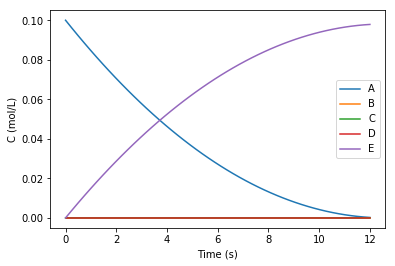

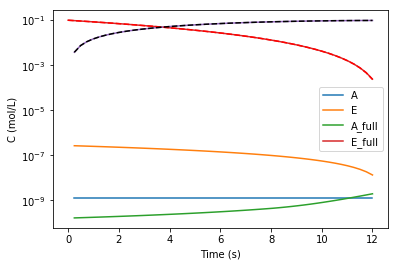

In [3]:
import numpy as np
from scipy.integrate import odeint

k1 = 1.5e-3   # 1/u.s;
k2 = 2.3e6    # u.L/u.mol/u.s;
k3 = 5.7e4    # 1/u.s;
k4 = 9.5e8    # u.L/u.mol/u.s;
k5 = 2.0e9    # u.L/u.mol/u.s;


def dCdt(C, t):
    Ca, Ce = C

    ra = -k1 * Ca - k2 * Ca * 2 * k1 / k2 - k3 * (k1 / k5 * Ca)**0.5
    re = k3 * (k1 / k5 * Ca)**0.5

    dCadt = ra
    dCedt = re
    return [dCadt, dCedt]

C0 = [0.1, 0]

tspan = np.linspace(0, 12)
sol = odeint(dCdt, C0, tspan)


# reload previous results
npzipfile = np.load('images/ethane-cracking.npz')
T = npzipfile['tspan']
CA = npzipfile['CA']
CE = npzipfile['CE']

import matplotlib.pyplot as plt
plt.plot(tspan, sol)
plt.plot(T, CA, 'r--', T, CE, 'k--')
plt.legend(['A', 'E', 'A_full', 'E_full'], loc='best')
plt.xlabel('Time (s)')
plt.ylabel('C (mol/L)')
plt.savefig('images/ethane-cracking-3.png')

![img](./images/ethane-cracking-3.png)

-   You can see the concentration profiles for the full model and the derived rate law are visually indistinguishable

-   The new rate law does not have any active intermediates in it

-   The new rate law is an approximation (a very good one in this case) of the real system

-   You need data to evaluate the utility of a proposed rate law




## Application to enzyme kinetics



-   Enzymes are catalysts that speed up the rates of reactions

-   The overall reactions are typically $S \rightarrow P$
    -   We refer to the reactants as *substrates* by convention

-   Enzyme kinetics often show first order kinetics at low concentration of substrate, and zeroth order kinetics at high concentration of substrate

-   Let us propose a mechansim that accounts for this behavior

-   We will assume the substrate can bind reversibly with the enzyme to form an enzyme-substrate complex

-   The enzyme-substrate complex can react further to form products

\begin{align*}
E + S \rightarrow E\cdot S \\
E\cdot S \rightarrow E + S \\
E\cdot S \rightarrow P + E
\end{align*}

-   Now, let us assume that $E\cdot S$ is an active intermediate

\begin{align*}
r_{E\cdot S} = 0 = k_1 [E][S] - k_2 [E\cdot S] - k_3 [E\cdot S]\\
\end{align*}

-   Solving for $[E\cdot S]$ yields

\begin{align*}
[E\cdot S] = \frac{k_1 [E][S]}{k_2 + k_3}
\end{align*}

-   This eliminates the hard to detect enzyme-substrate concentration

-   However, it is also difficult to measure the concentration of *free* enzyme $[E]$
    -   We usually cannot tell the difference between $[E]$ and $[E\cdot S]$
    -   We usually do know the total enzyme concentration $[E_t] = [E] + [E\cdot S]$

\begin{align*}
[E_t] = [E] + \frac{k_1 [E][S]}{k_2 + k_3}
\end{align*}

-   We can solve that equation for $[E]$

\begin{align*}
[E] = \frac{[E_t](k_2 + k_3)}{k_2 + k_3 + k_1[S]}
\end{align*}

-   Finally, we can write the rate law for production of products:

\begin{align}
r_P &=& k_3 [E\cdot S] \\
    &=& \frac{k_3 k_1 [E][S]}{k_2 + k_3} \\
    &=& \frac{k_1 k_3 [E_t][S]}{k_1 [S] + k_2 + k_3}
\end{align}

-   You can see from this rate law that if $k_1[S] \gg k_2 + k_3$ then the overall rate will be practically independent of $[S]$
    -   In other words, the rate will be zeroth order in $[S]$
    -   That happens because the enzyme is completely saturated with substrate
    -   Thus, the rate is determined by the rate of product formation

-   On the other hand, if $k_1[S] \ll k_2 + k_3$ then the rate of product formation will be approximately first order in $[S]$

-   The rate depends on the *total enzyme concentration*

\begin{align*}
E + S \rightarrow E\cdot S \\
E\cdot S \rightarrow E + S \\
E\cdot S \rightarrow E + P \\
I + E  \rightarrow E\cdot I\\
E\cdot I \rightarrow I + E
\end{align*}

\begin{align*}
r_P = \frac {k_3 E_t [S]}{[S] + (k_2 + k_3)/k_1 (1 + k_4 / k_5 [I])}
\end{align*}



## An application in catalysis



-   In heterogeneous catalysis molecules often
    -   adsorb on the surface,
    -   react,
    -   and then products desorb

-   Adsorption occurs on a *site*

-   There are a fixed number of sites available

-   These lead to behavior similar to the enzyme rate laws

-   Let us consider the overall reaction:

\begin{align*}
A + B \rightarrow P
\end{align*}

-   The reaction takes place on a surface, and is postulated to go through this mechanism:

![img](./images/surface-mechanism.png)

\begin{align*}
A + S &\rightarrow& A^* \\
A^* &\rightarrow& A + S \\
B + S &\rightarrow& B^* \\
B^* &\rightarrow& B + S \\
A^*  + B^* &\rightarrow& P + 2S
\end{align*}

-   $A^*$ and $B^*$ are adsorbed surface intermediates, different from intermediates

-   $S$ is a surface site

-   The total concentration of sites is $C_{S0}$
    -   $C_{S0} = C_S + C_{A*} + C_{B*}$
    -   Sites are not consumed in the reaction, they are regenerated by desorption reactions

-   Let us assume the last reaction is very slow

-   That implies that the reactions before it may reach equilibrium

-   In particular reactions 1 and 2, and reactions 3 and 4 may reach equilibrium

-   That implies the following statements are true:

\begin{equation}
Eqn\; 1 \\
0 = k_1 C_A C_S - k_2 C_{A^*} \\
0 = k_3 C_B C_S - k_4 C_{B^*}
\end{equation}

-   It is convenient to take the ratio of these equations:

\begin{align}
\frac{k_4}{k_2}\frac{C_{B^*}}{C_{A^*}} = \frac{k_3}{k_1}\frac{C_B}{C_A}
\end{align}

-   And then to solve for $C_{B*}$

\begin{equation}
Eqn\; 2 \\
C_{B^*} = \frac{K_2}{K_1} \frac{C_B}{C_A} C_{A^*}
\end{equation}

-   where we defined $K_1 = \frac{k_1}{k_2}$, $K_2 = \frac{k_3}{k_4}$
-   Plugging this result back into equation $Eqn\; 1$ and solving for $C_{A^*}$ leads to (after some algebra)

\begin{align*}
C_{A*} &=& \frac{k_1 C_A C_{S0}}{k_2 + k_1 C_A + k1 K_2/K_1 C_B} \\
       &=& \frac{K_1 C_A C_{S0}}{1 + K_1 C_A + K_2 C_B}
\end{align*}

-   Now plugging this result back into $Eqn\; 2$ gives us an expression for $C_{B^*}$

\begin{align*}
C_{B^*} = \frac{K_2 C_B C_{S0}}{1 + K_1 C_A + K_2 C_B}
\end{align*}

-   Finally, we can express the rate of production of products:

\begin{align*}
r_P = k_5 C_{A^*} C_{B^*} = \frac{k_5 K_1 K_2 C_A C_B C_{S0}^2}{(1 + K_1 C_A + K_2 C_B)^2}
\end{align*}

-   This rate law has an important feature
    -   It can show negative reaction order

-   We consider the rate as a function of the concentration of B here.



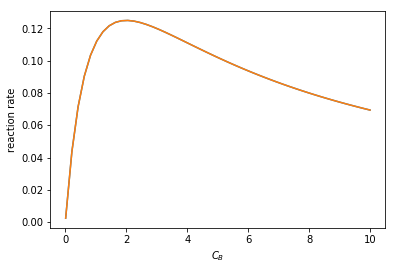

In [5]:
import numpy as np
import matplotlib.pyplot as plt

K1 = K2 = k5 = Cs0 = 1.0

C_A = 1.0
C_B = np.linspace(0.01, 10)
r = k5 * K1 * K2 * C_A * C_B * Cs0**2 / (1 + K1 * C_A + K2 * C_B)**2

plt.plot(C_B, r)
plt.xlabel('$C_B$')
plt.ylabel('reaction rate')
plt.savefig('images/lh-rate.png')
plt.show()

![img](./images/lh-rate.png)

-   For a fixed concentration of $A$ the rate initially increases with increasing concentration of $B$

-   The rate reaches a maximum, and then decreases

-   The rate decreases because $A$ and $B$ *compete* for the available sites and the rate is a *product* of the two concentrations
    -   As the concentration of $B$ increases, the fraction of sites covered by $B$ increases, and the fraction covered by $A$ decreases

-   Naturally, by stoichiometry we can get the other species rates:

\begin{align}
\frac{r_P}{\alpha_P} = \frac{r_A}{\alpha_A} = \frac{r_B}{\alpha_B} = r
\end{align}

-   The algebra to get here is tedious

-   But, consider the benefits

-   We have an analytical equation for the rate
    -   You can see that there are scenarios where the rate would be first order in A, or B (at low pressures)
    -   Or the rate could be constant at higher pressures
    -   The rate may actually decrease with increasing A (or B) because they compete for the same sites

-   Similar to the enzyme, there is a $C_{S0}$ in the rate
    -   You can increase the rate by increasing the number of sites present

-   In catalysis it is customary to normalize the concentrations of surface species by the total number of sites
    -   $\theta_{A^*} = C_{A^*} / C_{S0}$
    -   These are called fractional coverages

-   It is also common to use other units for reactions that happen on surfaces

-   For example, we do not usually consider the number of sites per unit volume, but per unit of surface area
    -   Then we need to know the surface area per unit volume
    -   Alternatively, we may use the surface area per unit mass, and the bulk density to relate that back to volume if needed

